In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import font_manager, rc

In [2]:
# 다중회귀분석 

kdata=pd.read_csv("C:/Project/DataProcessing/Data/education.csv",index_col=0)
kdata.head()


,year,id,age,education,income,education_year
0,2020,10000112,34,6,6593,16
1,2020,10000132,45,8,17720,21
2,2020,10000162,73,2,908,6
3,2020,10000182,58,4,2748,12
4,2020,10000192,27,4,1015,12


In [5]:
x=kdata[['age','education','income']]  
y=kdata[['education_year']]

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


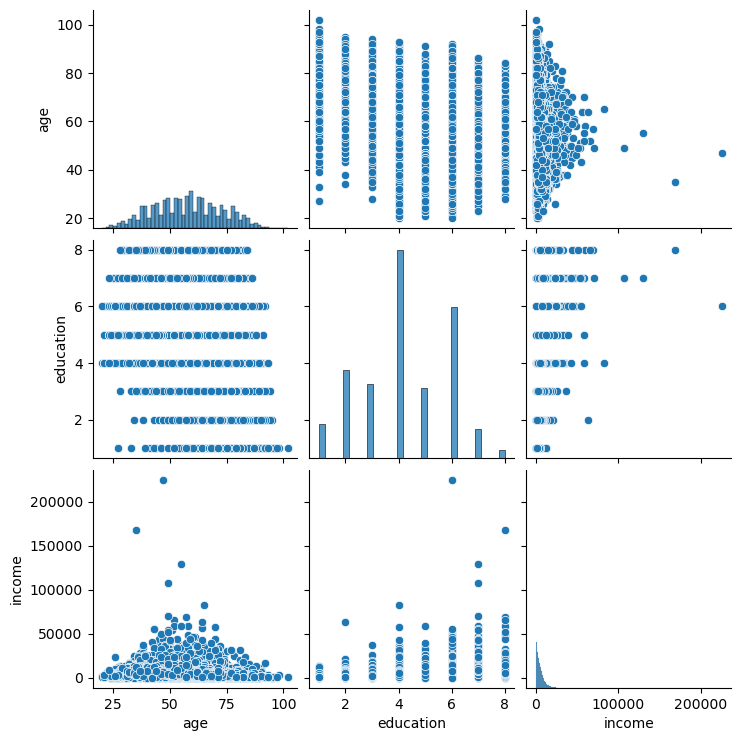

In [8]:
# 변수의 기본분석 (시각화)

sns.pairplot(x[['age', 'education', 'income']])  

In [10]:
# 다중 회귀분석 실행
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x)

results = model.fit()
print(results.summary(alpha=0.01))


print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")


                            OLS Regression Results                            
Dep. Variable:         education_year   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.306e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:13:08   Log-Likelihood:                -24346.
No. Observations:               18064   AIC:                         4.870e+04
Df Residuals:                   18060   BIC:                         4.873e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
const          1.5701      0.050     31.694      0.0

In [11]:
# 다중공선성 체크

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)


,VIF Factor,features
0,51.1,const
1,1.5,age
2,1.7,education
3,1.2,income
